## Project 4: Geospatial Data Analysis with Raster Data

In [ ]:
%pip install rasterio matplotlib numpy

### Create a Sample GeoTIFF File:

In [ ]:
import numpy as np
import rasterio
from rasterio.transform import from_origin

# Define raster size
width, height = 100, 100  # 100x100 pixels

# Create synthetic raster data (e.g., a gradient)
raster_data = np.linspace(0, 255, width * height, dtype=np.uint8).reshape((height, width))

# Define spatial transformation (arbitrary values)
transform = from_origin(0, 0, 1, 1)  # (origin_x, origin_y, pixel_size_x, pixel_size_y)

# Create and save the GeoTIFF file
with rasterio.open(
    'sample_raster.tif', 'w',
    driver='GTiff',
    height=height, width=width,
    count=1, dtype=raster_data.dtype,
    crs='+proj=latlong',
    transform=transform
) as dst:
    dst.write(raster_data, 1)

print("Raster file 'sample_raster.tif' created successfully.")


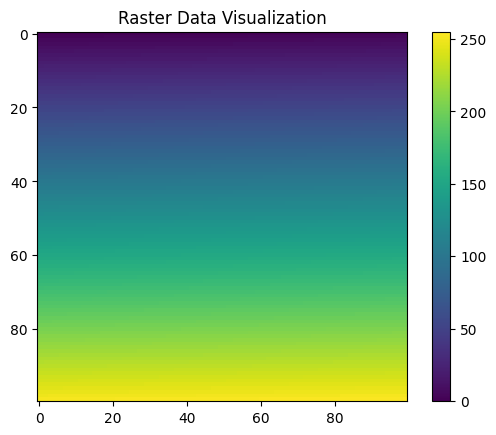

In [1]:
import rasterio
import matplotlib.pyplot as plt

# Open a raster file
with rasterio.open('sample_raster.tif') as src:
    # Read the raster data as a 2D array
    raster_data = src.read(1)  # Reading the first band
    
    # Plot the raster data
    plt.imshow(raster_data, cmap='viridis')
    plt.colorbar()
    plt.title('Raster Data Visualization')
    plt.show()

Mean value of the raster: 127.0002


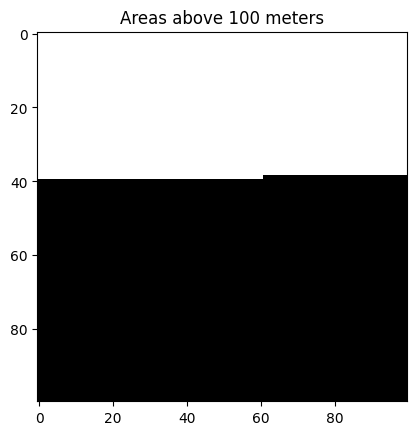

In [3]:
import numpy as np

# Perform basic analysis: Calculate the mean value of the raster
mean_value = np.mean(raster_data)
print(f"Mean value of the raster: {mean_value}")

# Apply a simple threshold: e.g., identify areas above a certain elevation (1000 meters)
threshold = 100
raster_data_binary = raster_data > threshold

# Plot the thresholded result
plt.imshow(raster_data_binary, cmap='binary')
plt.title(f"Areas above {threshold} meters")
plt.show()

Masked Data - Mean: 127.00019836425781, Min: 0.0, Max: 255.0


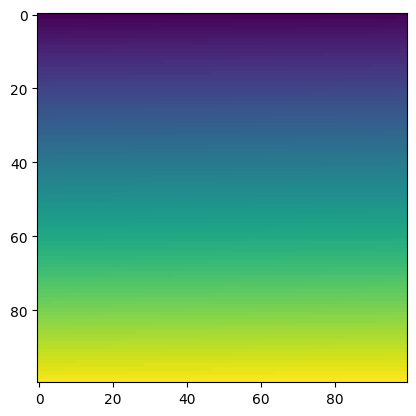

In [4]:
import numpy as np
import rasterio
from rasterio.plot import show

# Open the raster file
with rasterio.open('sample_raster.tif') as src:
    # Read the data
    raster_data = src.read(1)
    
    # Convert the data type to accommodate the fill value
    raster_data = raster_data.astype(np.float32)
    
    # Mask areas with no data (commonly represented by NaN or a specific value)
    raster_data_masked = np.ma.masked_equal(raster_data, -9999)  # Assuming -9999 is no data
    
    # Calculate basic statistics (mean, min, max) for valid (non-masked) values
    mean_masked = raster_data_masked.mean()
    min_masked = raster_data_masked.min()
    max_masked = raster_data_masked.max()
    
    print(f"Masked Data - Mean: {mean_masked}, Min: {min_masked}, Max: {max_masked}")
    
    # Plot the data
    show(raster_data_masked, cmap='viridis')